In [ ]:
import numpy as np

folder_date = '09152024'

# FILEPATH
calls = np.load(f'../experiments/custom_experiment/{folder_date}/mpd/calls.npy', allow_pickle=True).item()
parameters = np.load(f'../experiments/custom_experiment/{folder_date}/mpd/parameters.npy', allow_pickle=True).item()
rewards = np.load(f'../experiments/custom_experiment/{folder_date}/mpd/rewards.npy', allow_pickle=True).item()

In [30]:
objective_calls_index = calls[0] 

# Need to revert the transformation applied to the rewards in `src/custom_functions.py`
objective_vals = [-1000*r for r in rewards[0]]

In [31]:
# If needed to match their length
objective_calls_index = [0] + objective_calls_index

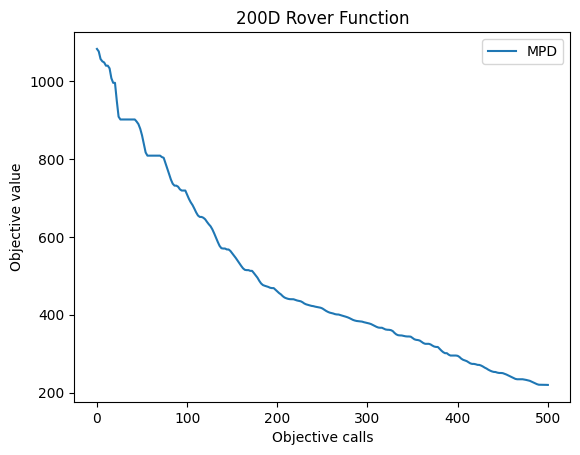

In [32]:
import matplotlib.pyplot as plt

plt.plot(objective_calls_index, objective_vals, label='MPD')
plt.xlabel('Objective calls')
plt.ylabel('Objective value')
plt.title('200D Rover Function')
plt.legend()
plt.show()